In [1]:
import pandas as pd
import xlrd

from matplotlib import pyplot as plt

# Real data

## Loading

Reading xlsx files:

In [2]:
train_xls = xlrd.open_workbook('./ignore/data/Real/train_311.xlsx')
test_xls = xlrd.open_workbook('./ignore/data/Real/test_90.xlsx')

# Check that number of sheets is right
print("Train sheets: {}".format(train_xls.nsheets))
print("Test sheets: {}".format(test_xls.nsheets))

Train sheets: 311
Test sheets: 90


Putting everything in dict, making some preprocessing on the fly:

In [3]:
data = dict(time = [],
            pressure = [],
            derivative = [],
            rig_type = [],
            target = []
           )

for shnum in range(test_xls.nsheets):
    sheet = test_xls.sheet_by_index(shnum)
    data['time'].append([val for val in sheet.col_values(0)[2:] if val!=''])
    data['pressure'].append([val for val in sheet.col_values(1)[2:] if val!=''])
    data['derivative'].append([val for val in sheet.col_values(2)[2:] if val !=''])
    data['rig_type'].append(sheet.col_values(4)[2])
    data['target'].append(sheet.col_values(6)[2])

for shnum in range(train_xls.nsheets):
    sheet = train_xls.sheet_by_index(shnum)
    data['time'].append([val for val in sheet.col_values(0)[2:] if val!=''])
    data['pressure'].append([val for val in sheet.col_values(1)[2:] if val!=''])
    data['derivative'].append([val for val in sheet.col_values(2)[2:] if val !=''])
    data['rig_type'].append(sheet.col_values(4)[2])
    data['target'].append(sheet.col_values(6)[2])

## EDA

Making a DataFrame from dict:

In [4]:
rad = pd.DataFrame.from_dict(data)

Check that lenght of arrays are the same:

In [5]:
assert [len(t) for t in rad.time] == [len(p) for p in rad.pressure]
assert [len(t) for t in rad.time] == [len(d) for d in rad.derivative]

If we plot the time series, we can see that time values are not strictly increasing!

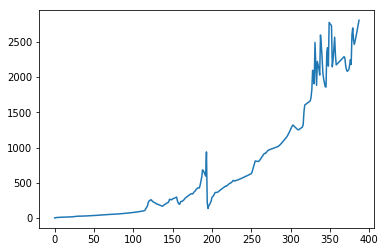

In [6]:
plt.plot(rad.time[0])

Here is an example:

In [7]:
rad.time[0][190:200]

[649.669450075801,
 622.964279822927,
 595.317695750304,
 938.260672921478,
 217.814474463996,
 136.536202462726,
 176.059091496719,
 192.252938728972,
 215.095659606503,
 240.703954012804]

In [11]:
# Some plotting

In [8]:
def plot_real(index, df, P=False):
    """
    Simple function to plot pressure and its derivative vs time.
    """
    f = plt.figure(figsize=(12,6))
    ax = f.add_subplot(111)
    ax.plot(df.time[index], df.derivative[index])
    if P:
        ax.plot(df.time[index], df.pressure[index])
    ax.hlines(df.target[index], 0, max(df.time[index]), 'r')
    ax.grid(True)
    ax.set_yscale('log')
    ax.set_xscale('log')
    plt.show()

At 58th observation from test set we can see that in several moments derivative is equal to 0, while pressure grows. This might be 

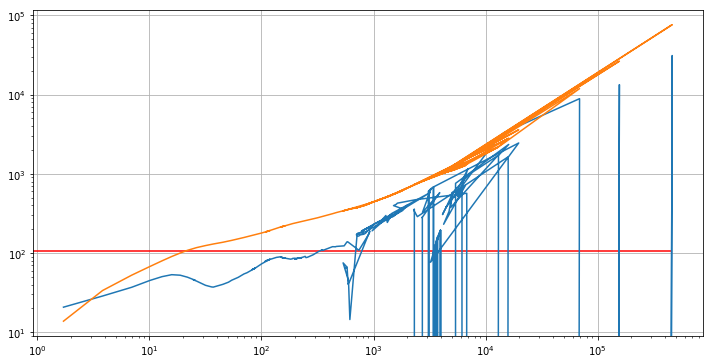

In [9]:
plot_real(58, rad, True)

# Synthetic data

## Loading

In [12]:
grp = pd.read_csv('./ignore/data/Synthetic/GRP.csv', sep=';')

In [18]:
grp.head()

,dPrad,Flag,t1,t2,t3,t4,t5,t6,t7,t8,...,p26,p27,p28,p29,p30,p31,p32,p33,p34,p35
0,4.964700,1,0.142302,0.201008,0.283931,0.401063,0.566516,0.800226,1.130349,1.596660,...,4.843167,4.869824,4.885403,4.905776,4.918480,4.944263,4.964698,4.966755,4.972298,4.981056
1,9.603391,1,0.142640,0.201485,0.284605,0.402015,0.567862,0.802126,1.133033,1.600451,...,8.197295,8.559702,8.872169,9.118807,9.239828,9.341486,9.503876,9.566713,9.603391,9.635922
2,99.234300,1,0.200000,0.300000,0.400000,0.600000,0.800000,1.133033,1.600451,2.260698,...,93.912665,95.586075,96.750701,97.112031,97.658911,98.355972,98.933263,99.127890,99.366391,99.622634
3,0.995000,1,0.500000,1.000000,1.500000,2.000000,3.000000,4.000000,5.665164,8.002257,...,0.979080,0.982906,0.985387,0.986238,0.987033,0.989083,0.991247,0.994639,0.994921,0.996324
4,0.199220,1,0.127128,0.160045,0.201485,0.253654,0.319332,0.402015,0.506107,0.637151,...,0.195222,0.195461,0.196087,0.196434,0.197363,0.198113,0.198730,0.199220,0.199638,0.199813


In [32]:
def plot_synthetic(index, df):
    f = plt.figure(figsize=(12,6))
    ax = f.add_subplot(111)
    ax.plot(grp.iloc[index, 2:37], grp.iloc[index, 37:])
    ax.hlines(grp.iloc[index, 0], 0, grp.iloc[index, 36])
    ax.grid(True)
    ax.set_yscale('log')
    ax.set_xscale('log')
    plt.show()

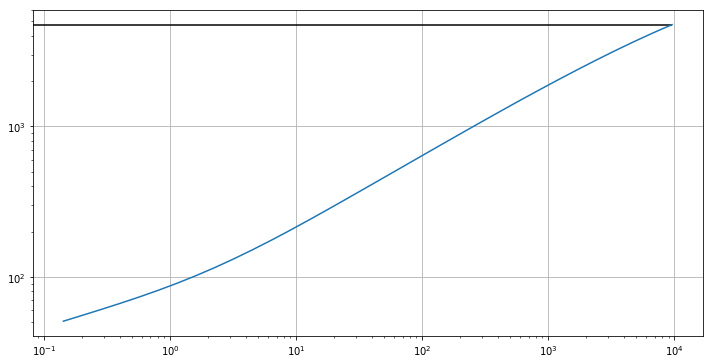

In [43]:
plot_synthetic(66, grp)

# Questions

Как считается производная?

В этих данных выбросы уже удалены?

В данных есть отрицательные давления, это нормально? Что с ними делать?

Во многих наблюдениях время не строго возрастающее. Надо отсортировать? Или это несет в себе смысл? (тест, лист 1)

В некоторых налюдениях производная равна 0, а давление растёт в точке - это ошибка / выброс? (тест, лист 59)

В синтетических данных dPrad - значение радиального режима. В реальных данных такой столбец тоже
присутствует, что он отображает? Нормально ли, что он не равен t (target)?